#  Capstone Project


In [2]:
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import seaborn as se
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 

In [4]:
df=pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [10]:
df['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [11]:
df['twp'].head(5)

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

In [13]:
len(df['title'].unique())

141

In [16]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [17]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic


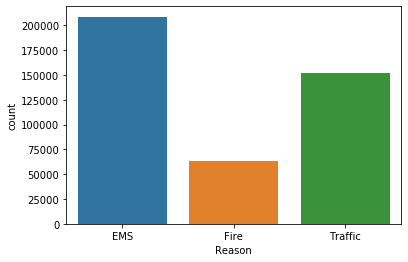

In [18]:
se.countplot(x='Reason',data=df)

In [22]:
type(df['timeStamp'].iloc[0])

str

In [25]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [28]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic


In [58]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['day']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [60]:
week={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

In [61]:
df['day']=df['day'].map(week)


In [62]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic,8,11,fri
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,fri
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,fri
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic,8,11,fri


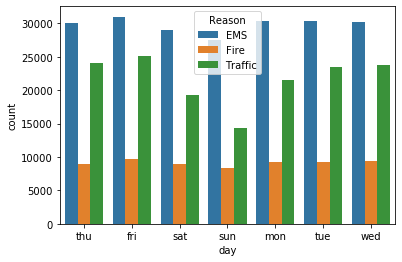

In [64]:
se.countplot(x='day',data=df,hue='Reason')

In [ ]:
se.lmplot(x='twp',y='month',data=df,col='twp',row='month')